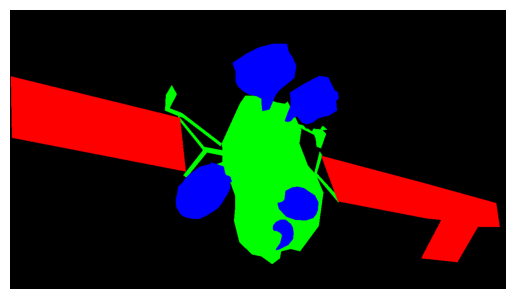

In [14]:
import os 
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
#  '/Volumes/My Passport/dataset/Final_dataset largest/mask/val/img_resize_430_mask.png'
folder_path = '/Volumes/My Passport/dataset/Final_dataset largest/mask/val'
image_file_name = 'img_resize_433_mask.png'

image_path = os.path.join(folder_path, image_file_name)
image = Image.open(image_path)

image_array = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.show()

In [16]:
reshape_array = image_array.reshape(-1, 3)
print(reshape_array.shape)

(921600, 3)


In [19]:

print("形状")
print(image_array.shape)
unique_value  = np.unique(reshape_array,axis=0)
if len(unique_value) > 3:
    print("there are more than 3 unique values", unique_value)
else:
    print("there are no 3 unique values", unique_value)
    

形状
(720, 1280, 3)
there are more than 3 unique values [[  0   0   0]
 [  0   0 255]
 [  0 255   0]
 [255   0   0]]


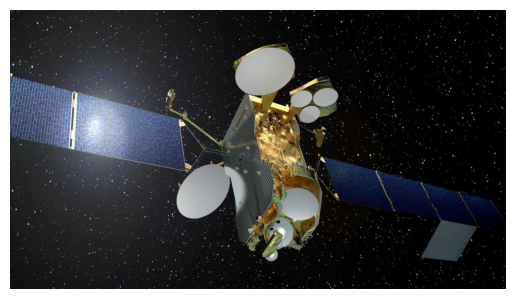

In [10]:
folder_path2 = '/Volumes/My Passport/dataset/Final_dataset largest/images/val'
image_file_name2 = 'img_resize_433.png'

image_path2 = os.path.join(folder_path2, image_file_name2)
image2 = Image.open(image_path2)
plt.imshow(image2)
plt.axis('off')
plt.show()

In [30]:
import cv2  

# 指定文件夹路径和图片文件名  
folder_path = '/Volumes/My Passport/dataset/Final_dataset largest/mask/val'  
image_file_name = 'img_resize_433_mask.png'  # 替换为你的实际图片文件名  

# 读取掩码图像  
image_path = os.path.join(folder_path, image_file_name)  
mask_image = cv2.imread(image_path)  # 读取图像  
mask_image = cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB)  # 转换为 RGB  
mask_image_width = mask_image.shape[1]
mask_image_height = mask_image.shape[0]
color_to_class = {  
    (0, 0, 255): 0,  # blue ->  antenna   
    (0, 255, 0): 1,  # green ->  body
    (255, 0, 0): 2   # red -> solar panel
}  
contours_dict = {0: [], 1: [], 2: []}   

# 获取类别的边缘点  
for color, class_index in color_to_class.items():  
    # 创建掩码  
    mask = np.all(mask_image == color, axis=-1).astype(np.uint8) * 255  
    
    # 查找边缘并提取轮廓  
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
    for contour in contours:  
        # 将轮廓转换为平面点  
        points = contour.reshape(-1,2)  
        normalized_points = points/np.array([mask_image_width, mask_image_height])
        normalized_points = normalized_points.reshape(-1)
        contours_dict[class_index].append(normalized_points)  
        
# 保存为 YOLO 格式的 TXT 文件  
output_txt_path = os.path.join('./', 'output.txt')  # 输出文件路径  
with open(output_txt_path, 'w') as f:  
    for class_index, points_list in contours_dict.items():  
        for points in points_list:  
            # 创建格式字符串  
            points_str = ' '.join(map(str, points))  
            f.write(f"{class_index} {points_str}\n")  

print(f"Contours saved to {output_txt_path}")  

Contours saved to ./output.txt
